# Mownit lab3

### Import bibliotek

In [4]:
from math import exp, sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np

### Moja wersja funkcji:

In [5]:
#f7, k=3, m=2, [-pi, 2pi]
def f(x):
    return exp(-3 * sin(2*x)) + 3 * cos(2*x)

In [6]:
def f_d(x):
    return -6 * sin(2*x) - 6*exp(-3*sin(2*x))*cos(2*x)

In [7]:
x_start = -pi
x_end = 2*pi

## Algorytmy interpolacji

In [8]:
def Chebyshev_node(k, n):
    return 0.5*(x_start + x_end) + 0.5*(x_end - x_start) * cos(pi * (2*k+1) * (1/(2*n)))
def even_node(i, n):
    return x_start + i * (x_end - x_start)/(n-1)

def build_xy_data(points_number, nodes_method):
    x_points = [0] * points_number
    y_points = [0] * points_number
    for i in range(points_number):
        x_points[i] = nodes_method(i, points_number)
        y_points[i] = f(x_points[i])
    return x_points, y_points

In [9]:
build_xy_data(3,Chebyshev_node)

([5.651844896321887, 1.5707963267948968, -2.5102522427320926],
 [18.34898564633229, -1.9999999999999991, 0.9671323793121457])

## Funkcja sklejana dwu stopniowa

In [10]:
def get_val(coeff, xi, x):
    val = 0
    for i, elem in enumerate(coeff):
        val += elem * (x - xi) ** i
    return val

def spline2(x_points, y_points, xs, boundary_cond):
    size = len(x_points) - 1
    matrix = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            if i == j:
                matrix[i][j] = 1
            if j == i-1:
                matrix[i][j] = 1

    g = np.zeros(size); h = []
    for i in range(size):
        h.append(x_points[i+1] - x_points[i])
        g[i] = 2 / h[i] * (y_points[i+1] - y_points[i])
    b = np.linalg.solve(matrix, g)

    b = list(b)
    b = [0] + b

    a = []; c = []
    for i in range(size):
        a.append((b[i+1] - b[i]) / (2 * h[i]))
        c.append(y_points[i])
    if boundary_cond == 2:
        b[0] = (y_points[1] - y_points[0]) / (x_points[1] - x_points[0])
        a[0] = 0

    nr_fun = 0
    ys = []
    for i in range(len(xs)):
        while x_points[nr_fun + 1] < xs[i] < x_points[-1]:
            nr_fun += 1
        ys.append(get_val([c[nr_fun], b[nr_fun], a[nr_fun]], x_points[nr_fun], xs[i]))

    return ys

## Funkcja sklejana trójstopniowa

In [11]:
def spline3(x_points, y_points, xs, boundary_cond):
    size = len(x_points) - 2
    matrix = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            if i == j:
                matrix[i][j] = 4
            if j == i+1 or j == i-1:
                matrix[i][j] = 1

    g = np.zeros(size); h = []
    for i in range(size):
        h.append(x_points[i+1] - x_points[i])
        g[i] = 6 / (h[i]**2) * (y_points[i] - 2*y_points[i+1] + y_points[i+2])
    h.append(x_points[-1] - x_points[-2])
    z = np.linalg.solve(matrix, g)

    z = list(z)
    if boundary_cond == 1:
        z = [0] + z + [0]
    else:
        z = [z[0]] + z + [z[-1]]

    a = []; b = []; c = []; d = []
    for i in range(size+1):
        a.append((z[i+1] - z[i]) / (6 * h[i]))
        b.append(0.5 * z[i])
        c.append((y_points[i+1] - y_points[i]) / h[i] - (z[i+1] + 2 * z[i]) / 6 * h[i])
        d.append(y_points[i])

    nr_fun = 0
    ys = []
    for i in range(len(xs)):
        while x_points[nr_fun + 1] < xs[i] < x_points[-1]:
            nr_fun += 1
        ys.append(get_val([d[nr_fun], c[nr_fun], b[nr_fun], a[nr_fun]], x_points[nr_fun], xs[i]))

    return ys

### Proste testy

In [13]:
def gen_x(n):
    x_delta = (x_end - x_start)/(n-1)
    xt = []
    for i in range(n):
        x = x_start + i * x_delta
        xt.append(x)
    return xt

In [14]:
print(gen_x(10))

[-3.141592653589793, -2.0943951023931957, -1.0471975511965979, 0.0, 1.0471975511965974, 2.094395102393195, 3.141592653589793, 4.1887902047863905, 5.235987755982988, 6.283185307179586]


In [15]:
def visualize2(n, node_method):
    xs, ys = build_xy_data(n,node_method)
    xt= gen_x(100)
    yt = spline2(xs,ys,xt,1)
    plt.plot(xt,yt)
    xp,yp = build_xy_data(100,even_node)
    plt.plot(xp,yp)
    plt.scatter(xs,ys, c = ["#000000"])

In [16]:
def visualize3(n, node_method):
    xs, ys = build_xy_data(n,node_method)
    xt= gen_x(100)
    yt = spline3(xs,ys,xt,1)
    plt.plot(xt,yt)
    xp,yp = build_xy_data(100,even_node)
    plt.plot(xp,yp)
    plt.scatter(xs,ys, c = ["#000000"])

### Wizualizacja interpolacji

## Wizualizacja zagadnienia Lagrange'a

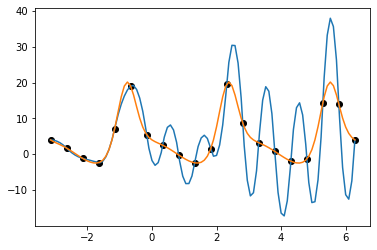

In [43]:
visualize2(20,even_node)

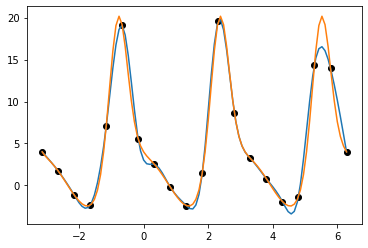

In [44]:
visualize3(20,even_node)

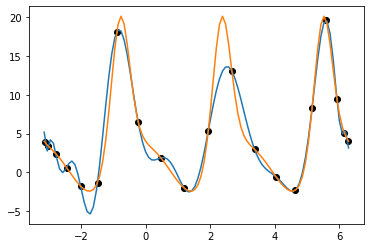

In [16]:
visualize(20,Chebyshev_node,eval_lagrange)

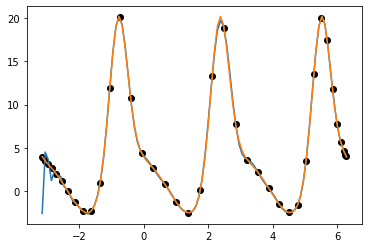

In [17]:
visualize(40,Chebyshev_node,eval_newton)

## Wyliczanie błędów w obliczeniach

In [50]:
def diff_spline2(n, test_m):
    xs, ys = build_xy_data(n,even_node)
    xt= gen_x(100)
    yt = spline2(xs,ys,xt,1)
    xp, yp = build_xy_data(100,even_node)
    return test_m([abs(yp[i]-yt[i]) for i in range(len(yp))])

def diff_spline3(n, test_m):
    xs, ys = build_xy_data(n,even_node)
    xt= gen_x(100)
    yt = spline3(xs,ys,xt,1)
    xp, yp = build_xy_data(100,even_node)
    return test_m([abs(yp[i]-yt[i]) for i in range(len(yp))])

In [53]:
diff_spline2(20,max)

18.87668148582506

In [54]:
diff_spline3(20,max)

3.628722667368095

In [24]:
diff_lagrange(40,max,Chebyshev_node, eval_newton)

6.528125879612071

In [25]:
diff_lagrange(40,np.mean,Chebyshev_node, eval_newton)

0.19976215230536518

## Wizualizacja zależności błędu od liczby węzłów

In [65]:
def visualize_diff(test_m, diff_m, start_n, end_n):
    xn = [i for i in range(start_n, end_n+1)]
    yn = [diff_m(i, test_m) for i in range(start_n, end_n+1)]
    plt.plot(xn,yn)


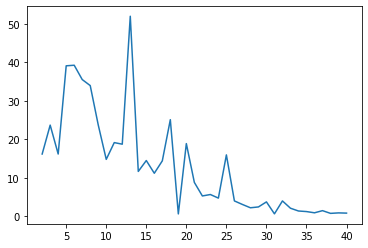

In [68]:
visualize_diff(max, diff_spline2, 2, 40)

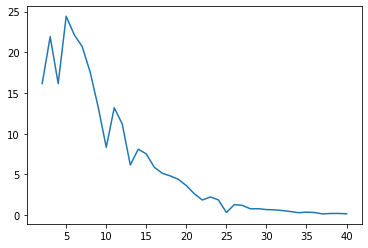

In [69]:
visualize_diff(max, diff_spline3, 2, 40)

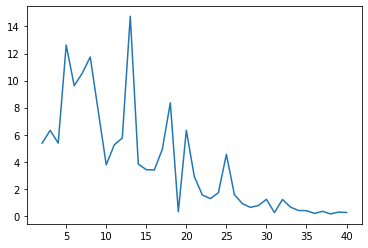

In [72]:
visualize_diff(np.mean, diff_spline2, 2, 40)

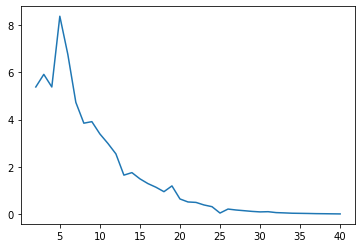

In [71]:
visualize_diff(np.mean, diff_spline3, 2, 40)